In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
from sklearn.cluster import KMeans

This example uses the [Utilities](https://github.com/GauthamBest/Training_Data/blob/master/utilities.csv) data set and some example code of running classification trees from chapter 15 of [Data Mining for Business Analytics](https://www.dataminingbook.com/book/python-edition)

The data dictionary

Variable 	|		Description
------------|  ----------------
Company	|	    	Company name
Fixed_charge    |		Fixed-charge coverage ratio (income/debt)|
RoR    |				Percent rate of return on capital
Cost    |				Cost per KW capacity in place
Load_factor   | 			Annual load factor
Demand_growth |   		Percent demand growth
Sales    |			Sales (KWH use per year)
Nuclear   | 			Percent nuclear
Fuel_Cost	|		Total fuel costs (cents per KWH)

Using k-means clustering:

1. Cluster the data into two clusters. What do these clusters represent?
2. Cluster the data into six clusters. What do these clusters represent?
3. Using the [inertia](https://scikit-learn.org/stable/modules/clustering.html?highlight=inertia) as a criteria, select the optimal number of clusters

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion: $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

In [2]:
data = pd.read_csv('data/Utilities.csv')
data.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [3]:
utilities_df = data.set_index('Company')
kmeans = KMeans(n_clusters=2, random_state=0)

In [6]:
kmeans.fit(utilities_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [7]:
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
      dtype=int32)

In [14]:
utilities_df.reset_index().groupby(kmeans.labels_)['Company'].apply(list)

0              [Florida , Idaho, Nevada, Puget, Texas]
1    [Arizona , Boston , Central , Commonwealth, NY...
Name: Company, dtype: object

In [15]:
_.to_list()[1]

['Arizona ',
 'Boston ',
 'Central ',
 'Commonwealth',
 'NY',
 'Hawaiian ',
 'Kentucky',
 'Madison ',
 'New England',
 'Northern',
 'Oklahoma',
 'Pacific ',
 'San Diego',
 'Southern',
 'Wisconsin',
 'United',
 'Virginia']

In [17]:
utilities_df.groupby(kmeans.labels_).mean()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,1.098000,10.360000,177.000000,55.700000,2.940000,14229.600000,4.500000,0.714800
1,1.118824,10.847059,165.588235,57.352941,3.329412,7350.647059,14.205882,1.216824


In [18]:
kmeans.inertia_

81864278.6270715

In [19]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(utilities_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [20]:
utilities_df.reset_index().groupby(kmeans.labels_)['Company'].apply(list)

0           [Hawaiian , Kentucky, Northern, Wisconsin]
1                                       [Idaho, Texas]
2    [Boston , Commonwealth, Madison , New England,...
3                                      [Nevada, Puget]
4    [Arizona , Central , Florida , Oklahoma, South...
5                                                 [NY]
Name: Company, dtype: object

In [21]:
utilities_df.groupby(kmeans.labels_).mean()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,1.227500,12.425000,172.500000,60.400000,4.825000,7628.5,22.825000,0.935750
1,1.130000,10.450000,174.500000,55.500000,0.600000,13294.5,0.000000,0.472500
2,0.988571,9.628571,178.428571,59.142857,3.042857,6136.0,15.428571,1.458714
3,0.955000,8.700000,212.500000,53.750000,7.850000,16716.0,0.000000,0.694000
4,1.170000,12.000000,132.500000,54.700000,2.133333,9887.0,8.183333,0.988167
5,1.490000,8.800000,192.000000,51.200000,1.000000,3300.0,15.600000,2.044000


In [22]:
kmeans.inertia_


6729494.02062575

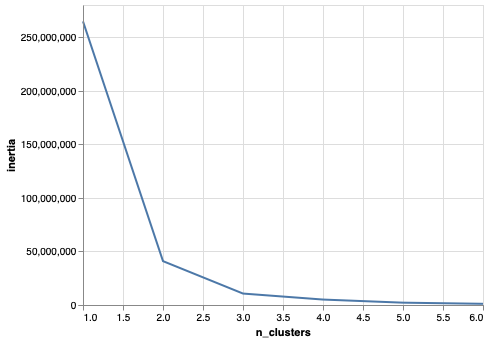

In [23]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
alt.Chart(inertias).mark_line().encode(
     x='n_clusters', y='inertia')

In [25]:
utilities_df = data.set_index('Company')
kmeans = KMeans(n_clusters=3, random_state=0).fit(utilities_df)
utilities_df.groupby(kmeans.labels_).mean()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,1.089091,10.263636,178.454545,58.763636,3.127273,6214.545455,19.536364,1.376000
1,1.042500,9.575000,193.500000,54.625000,4.225000,15005.250000,0.000000,0.583250
2,1.194286,12.142857,137.571429,55.514286,2.857143,9675.428571,7.014286,0.970143
